<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://static.lms.ebaconline.com.br/content-files/8c8d1912-fa5e-4612-b7f6-568301a125bc/original.xml'
try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  conteudo = resposta.text
print(conteudo)

In [61]:
import requests
from requests.exceptions import HTTPError
def crawl_website(url: str) -> str:
  try:
    resposta = requests.get(url)
    resposta.raise_for_status()
  except HTTPError as exc:
   print(exc)
  else:
    return resposta.text

In [62]:
URL = 'https://static.lms.ebaconline.com.br/content-files/8c8d1912-fa5e-4612-b7f6-568301a125bc/original.xml'
conteudo = crawl_website(url=URL)
with open(file='estados-bruto.xml', mode='w', encoding='utf8') as arquivo:
   arquivo.write(conteudo)

In [63]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup 

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')
      
      # https://static.lms.ebaconline.com.br/content-files/8c8d1912-fa5e-4612-b7f6-568301a125bc/original.xml

In [5]:
# visualize os resultados
fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [64]:
#Separando em listas apenas as colunad de interesse
# Aqui percebi que haviam palavras acentuadas também ==>.replace('PARÁIBA','PARAÍBA')
estado=[]
for tag in fonte.find_all('nome'):
  estado.append(tag.string.replace('SAO PAULO', 'SÃO PAULO').replace('PIAUI','PIAUÍ').replace('GOIAS','GOIÁS').replace('PARA','PARÁ').replace('CEARA','CEARÁ').replace('MARANHAO','MARANHÃO').replace('PARÁIBA','PARAÍBA').replace('PARÁNA','PARANÁ').replace('RONDONIA','RONDÔNIA').replace('AMAPA','AMAPÁ'))
print(estado)

sigla=[]
for tag in fonte.find_all('sigla'):
  sigla.append(tag.string)
print(sigla)

regiao=[]
for tag in fonte.find_all('regiao'):
  regiao.append(tag.string)
print(regiao)




['ACRE', 'ALAGOAS', 'AMAPÁ', 'AMAZONAS', 'BAHIA', 'CEARÁ', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARÁ', 'PARAÍBA', 'PARANÁ', 'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDÔNIA', 'RORAIMA', 'SANTA CATARINA', 'SÃO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [65]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui
header = [
  'estado', 
  'sigla', 
  'regiao', 
]
import csv 
with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=',')
  escritor_csv.writerows(
      [header] + list(map(lambda estado,sigla,regiao: [ estado,sigla,regiao], estado,sigla,regiao)))

### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [66]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

In [67]:
fonte= pd.read_csv('cidades-bruto.csv')

In [68]:
# visualize os resultados
# continue o codigo aqui
fonte

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [69]:
fonte = fonte.query('Censo == 2010.0')


In [70]:
nova_fonte = fonte[['UF','nome','Pop_est_2009','PIB','PIB_percapita']]

In [71]:
nova_fonte

,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [72]:
cidades_limpo_df = nova_fonte.rename(columns = {'UF':'estado','nome':'cidade','Pop_est_2009':'populacao','PIB':'pib','PIB_percapita':'pib_percapita'})

In [73]:
cidades_limpo_df # Tentei remover os acentos mas não consegui! Por isso optei por acrescentar acentos no CSV estados-limpo!

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [74]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;
# continue o codigo aqui
NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_limpo_df.to_csv('cidades-limpo.csv', index=False)
cidades_limpo_df['estado'].unique()


array(['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS',
       'PIAUÍ', 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'SERGIPE', 'SÃO PAULO',
       'PARAÍBA', 'TOCANTINS', 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ',
       'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO', 'MATO GROSSO', 'PARANÁ',
       'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE', 'RIO GRANDE DO NORTE',
       'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL'], dtype=object)

In [75]:
#Importando dataframe para a questao 1.3. Brasil

import pandas as pd
estados_limpo_df = pd.read_csv('estados-limpo.csv')
estados_limpo_df['estado'].unique()

array(['ACRE', 'ALAGOAS', 'AMAPÁ', 'AMAZONAS', 'BAHIA', 'CEARÁ',
       'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIÁS', 'MARANHÃO',
       'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARÁ', 'PARAÍBA', 'PARANÁ',
       'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE',
       'RIO GRANDE DO SUL', 'RONDÔNIA', 'RORAIMA', 'SANTA CATARINA',
       'SÃO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS'], dtype=object)

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [76]:
# Combinando os 2 dataframes!
brasil = pd.merge(left=estados_limpo_df, right=cidades_limpo_df, on='estado', how='inner')

In [77]:
# solução do exercício 1.3
brasil

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,23627,2.886858e+05,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


In [78]:
# Salvando os dados do dataframe no arquivo brasil.csv

brasil.to_csv('brasil.csv', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [79]:
# Importando os dados do dataframe do arquivo brasil.csv
import pandas as pd

brasil_df = pd.read_csv('brasil.csv')

In [80]:
brasil_df

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,23627,2.886858e+05,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [82]:
cidades_pop_mais = brasil_df.sort_values(by=['populacao'], ascending = False)[['cidade','populacao']].head(10) #Realmente funcionou igual ao código debaixo!
cidades_pop_mais
#cidades_pop_mais = brasil_df.nlargest(10, columns=['populacao'], keep='first')
#colunas = ['cidade','populacao']
#cidades_pop_mais[colunas]

,cidade,populacao
4403,São Paulo,11037593
2747,Rio de Janeiro,6186710
246,Salvador,2998056
802,Brasília,2606885
766,Fortaleza,2505552
5447,Belo Horizonte,2452617
2056,Curitiba,1851215
142,Manaus,1738641
2446,Recife,1561659
1687,Belém,1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [83]:
# código para responder a pergunta
import pandas as pd
brasil_df = pd.read_csv('brasil.csv')

brasil_df = brasil_df[brasil_df['regiao'] == 'NORDESTE']
#cinco_menores = brasil_df.sort_values(by=['pib'], ascending = False)[['cidade','pib_percapita','regiao']].head(5) Acho que aqui não está certo!
cinco_menores = brasil_df[['cidade','pib_percapita','regiao']].groupby('pib_percapita').agg('min')
cinco_menores.head(5)

,cidade,regiao
pib_percapita,,
1929.969971,São Vicente Ferrer,NORDESTE
2203.830078,Cajapió,NORDESTE
2358.239990,Dom Inocêncio,NORDESTE
2368.159912,Timbiras,NORDESTE
2416.969971,Axixá,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [84]:
# código para responder a pergunta 
import pandas as pd
brasil_df = pd.read_csv('brasil.csv')

quinze_maiores = brasil_df[brasil_df['estado'] == 'SÃO PAULO']
quinze_maiores = quinze_maiores.nlargest( 15, columns=['pib'], keep='first')
colunas = ['cidade','pib']
quinze_maiores[colunas]

,cidade,pib
4403,São Paulo,389317152.0
4355,Guarulhos,32473828.0
4472,Campinas,31654720.0
4238,Osasco,31616452.0
3942,São Bernardo do Campo,28935768.0
4476,Barueri,26908070.0
3900,Santos,22546134.0
4126,São José dos Campos,22018042.0
4146,Jundiaí,16585137.0
3948,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [85]:
# código para responder a pergunta 
import pandas as pd
brasil_df = pd.read_csv('brasil.csv')

pib_sc = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']
pib_sc = pib_sc[['pib']].agg('sum')
pib_sc

pib    1.298063e+08
dtype: float64

 - Qual é o população da região sul?

In [86]:
# código para responder a pergunta
import pandas as pd
brasil_df = pd.read_csv('brasil.csv')

pop_sul = brasil_df[brasil_df['regiao'] == 'SUL']
pop_sul = pop_sul[['populacao']].agg('sum')
pop_sul

populacao    27719118
dtype: int64

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [87]:
# código para responder a pergunta
import pandas as pd
brasil_df = pd.read_csv('brasil.csv')

pib_percap_medio = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']
pib_percap_medio= pib_percap_medio[['pib_percapita']].agg('mean')
pib_percap_medio

pib_percapita    14458.89686
dtype: float64

 - Qual é a população do Brasil?

In [88]:
# código para responder a pergunta
import pandas as pd
brasil_df = pd.read_csv('brasil.csv')

populacao_brasil = brasil_df['populacao'].agg('sum')
print(populacao_brasil)

191176146


### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [89]:
import pandas as pd
brasil_df = pd.read_csv('brasil.csv')

cidades_pop=brasil_df[['cidade','populacao']].groupby('populacao').agg('min').head(10).reset_index()
cidades_pop.head(10)


,populacao,cidade
0,837,Borá
1,890,Serra da Saudade
2,1018,Anhanguera
3,1115,Araguainha
4,1122,Nova Castilho
5,1129,Oliveira de Fátima
6,1212,Miguel Leão
7,1221,Cedro do Abaeté
8,1266,Parari
9,1273,Chapada de Areia


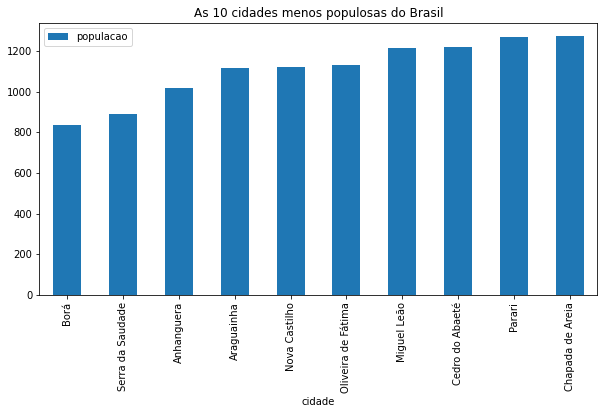

In [91]:
cidades_pop.head(10).plot.bar(figsize=(10,5),x='cidade', y='populacao', rot=90, title="As 10 cidades menos populosas do Brasil")

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [96]:
# código para gerar a visualização
#Acho que, o que se pede aqui é a soma da população por região! Fiz assim:

import pandas as pd
brasil_df = pd.read_csv('brasil.csv')

brasil_proporcao = brasil_df[['regiao','populacao']].groupby('regiao').agg('sum')
brasil_proporcao

,populacao
regiao,
CENTRO-OESTE,13773930
NORDESTE,53491940
NORTE,15359608
SUDESTE,80831550
SUL,27719118


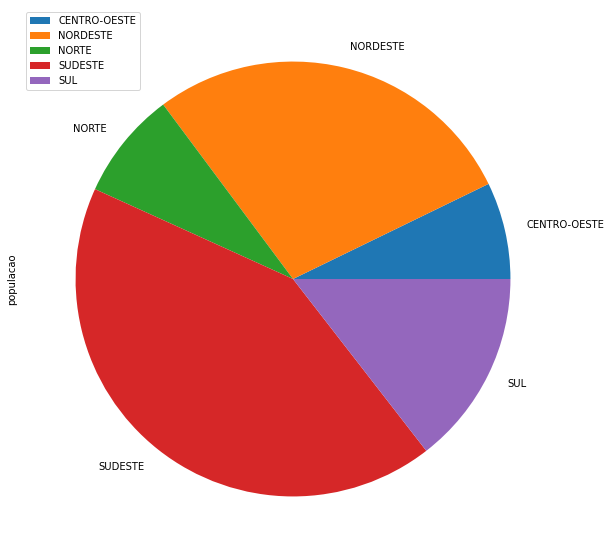

In [97]:
brasil_proporcao.plot.pie(y='populacao', figsize=(15, 10))